<a href="https://colab.research.google.com/github/Mwadz/IP-week-6/blob/main/Week_6_Machine_Learning_Regression_Cynthia_Mwadime_2022_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Ltd prediction result

We are to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly We should include rank in your training.

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

[Documentation](https://docs.google.com/document/d/1GEZxGovmBjlZhn3u4rRL25M7xxuzR8xOBxX2RgSzHZQ/edit?usp=sharing)

**Context**

The men's FIFA World Ranking is a ranking system for men's national teams in association football.a more detailed explanation and history of the rankings is available [here](https://en.wikipedia.org/wiki/FIFA_World_Rankings) 

# Importing Libraries

In [285]:
import numpy as np
import pandas as pd


# Loading the Datasets

In [286]:
# loading the results and ranking datasets
rank = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')


# Exploration

## Rank Dataset

In [287]:
# viewing the rank dataset shape
rank.shape

(57793, 16)

In [288]:
# previewing the fifa ranking dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [289]:
# getting information on the results dataset
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [290]:
# changing the rank_date column datatype
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

In [291]:
# viewing the count, mean, maximum and minimum values, standard deviation and percentiles of numerical columns
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [292]:
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [293]:
#renaming rank_date column to match the results dataframe to make merging possible
rank.rename(columns={"rank_date":"date"}, inplace=True)

In [294]:
# confirming that there are no null values in the rank df
rank.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
dtype: int64

In [295]:
# checking for duplicates
rank.duplicated().sum()

37

There are 37/57793 duplicated rows. These are dropable since they only make up 0.0006402159431072968  of the total proportion 0.064%

In [296]:
# dropping the duplicates
rank.drop_duplicates(keep=False, inplace=True)
# confirming
rank.duplicated().sum()

0

## Results Dataset

In [297]:
# viewing the reslts dataset shape
results.shape

(40839, 9)

In [298]:
# previewing the fifa results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [299]:
# getting information on the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Observation**: looks like we'll have to change the date datatype from object to date

In [300]:
# changing the date column datatype
results['date'] = pd.to_datetime(results['date'])

In [301]:
# viewing the count, mean, maximum and minimum values, standard deviation and percentiles of numerical columns
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [302]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [303]:
# confirming that there are no null values in the results df
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [304]:
results.duplicated().sum()

0

## Merging the Datasets

In [305]:
# merging the columns we'll use while working out the questions
soccer = pd.merge(results,rank[['country_full', 'date', 'rank']],how='left', left_on=['date','country'], right_on=['date','country_full'])

* We have a new df socccer which we'll use while performing regresssion

In [306]:
# checking to see whether everything's in order
soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          40839 non-null  datetime64[ns]
 1   home_team     40839 non-null  object        
 2   away_team     40839 non-null  object        
 3   home_score    40839 non-null  int64         
 4   away_score    40839 non-null  int64         
 5   tournament    40839 non-null  object        
 6   city          40839 non-null  object        
 7   country       40839 non-null  object        
 8   neutral       40839 non-null  bool          
 9   country_full  950 non-null    object        
 10  rank          950 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB


**Observations**
* looks like we have missing values in our rank and country_full columns
* country_full and country columns are similars so that makes the country_full column dispensable
*the rank column we'll use in prediction as our y so we have to get rid of the null values regardless of how many they are


In [307]:
# Dropping thr country_full column
soccer.drop(['country_full'], axis=1, inplace=True)
soccer.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN


In [308]:
# getting rid of the records with missing values
soccer2 = soccer.dropna(axis=0)
soccer2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
rank          0
dtype: int64

In [309]:
# cchecking for duplicates
soccer2.duplicated().sum()

0

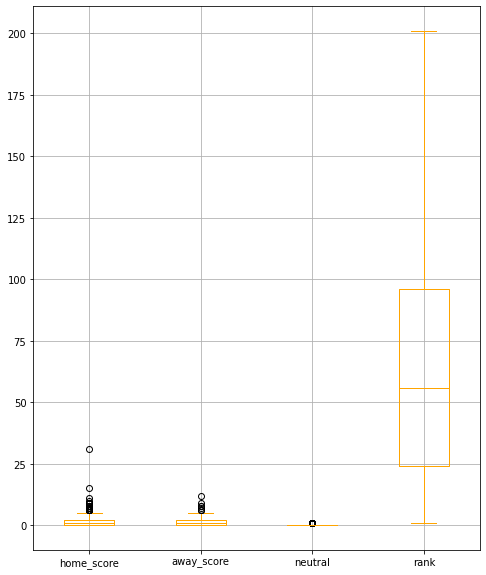

In [310]:
# prompting system to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# checking for outliers
soccer2.boxplot(figsize=(8,10),color='orange');

In [311]:
# setting our y as rank

y= soccer2['rank']

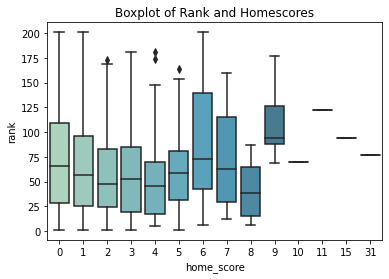

In [312]:
# can add pallete to boxplot
sns.boxplot(soccer2['home_score'],y ,palette='GnBu_d')
plt.title("Boxplot of Rank and Homescores")
plt.show()


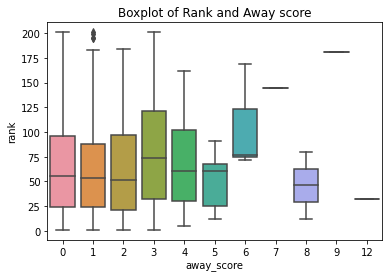

In [313]:
# can add pallete to boxplot
sns.boxplot(soccer2['away_score'],y)
plt.title("Boxplot of Rank and Away score")
plt.show()

* The data seems to show that there's no significant difference between home and away score outliers. The outliers might help in prediction so we wont be removing them.

In [314]:
# feature engineering: generating a Win, Lose or Draw column and naming it wld
# first we define a function that iterates through the records returning either 
# a W, L or D depending on the home and away score columns
def wld(score):
    home_score = score[0]
    away_score = score[1]
    
    
    if home_score < away_score:
      return 'L'
    elif home_score > away_score:
      return 'W'
    else:
      return 'D'

# Then here we define the column and dictate what it'll be filled with
soccer2['result'] = soccer2[['home_score', 'away_score']].apply(wld, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [315]:
soccer2.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,result
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59.0,W
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8.0,D
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35.0,W


# EDA

In [316]:
# importing visualisation libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [317]:
# checking the discriptive analysis
soccer2.describe()

,home_score,away_score,rank
count,950.000000,950.000000,950.000000
mean,1.657895,1.042105,64.905263
std,1.918743,1.234521,48.075168
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,24.000000
50%,1.000000,1.000000,56.000000
75%,2.000000,2.000000,96.000000
max,31.000000,12.000000,201.000000


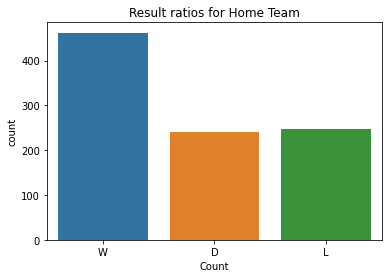

In [318]:
sns.countplot(data=soccer2, x='result')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

* most of our matches resulted in wins while losses and draws are almost the same proportion.. therefor we considerstratified sampling using this feature.

In [319]:
print('More Specific home team result ratios: ')
soccer2.result.value_counts()

More Specific home team result ratios: 


W    462
L    247
D    241
Name: result, dtype: int64

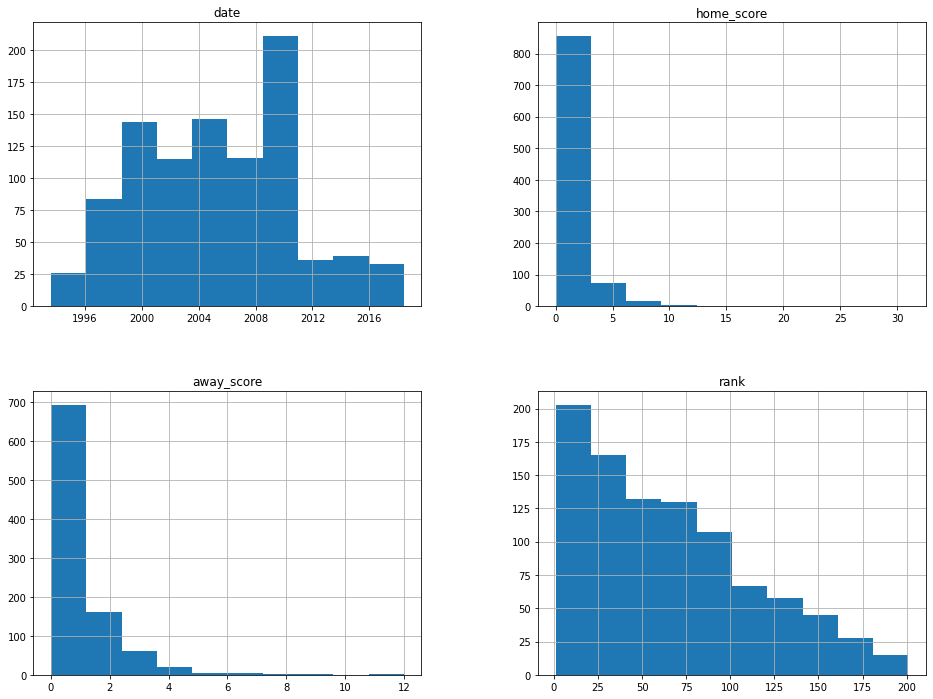

In [320]:
# plotting the histogram for every variable
soccer2.hist(bins=10, figsize=(16,12))
plt.show()

**Observations**
* most of our data is from 2000-2010
* most scores per game are < 5 
* most ranks are high suggesting lots of ties

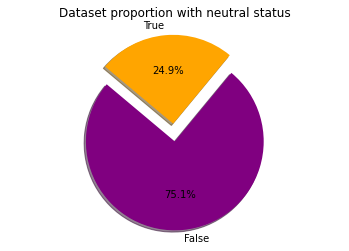

In [321]:
# finding out what proportion of our dataset has children
plt.pie(results['neutral'].value_counts(normalize=True), labels =results['neutral'].value_counts().index,colors = ['purple', 'orange'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Dataset proportion with neutral status')
plt.show()

In [322]:
# finding out the most popular tournaments in our dataset
df = soccer2.tournament.value_counts()
sorted = pd.DataFrame(df)
sorted.columns

top_10 = sorted.iloc[:10] 
top_10

,tournament
Friendly,600
FIFA World Cup qualification,153
UEFA Euro qualification,41
AFC Asian Cup qualification,37
CONIFA World Football Cup,15
Cyprus International Tournament,8
AFF Championship,7
Gulf Cup,7
Copa América,6
CECAFA Cup,6


In [272]:
# Installing heatmapz
!pip install heatmapz


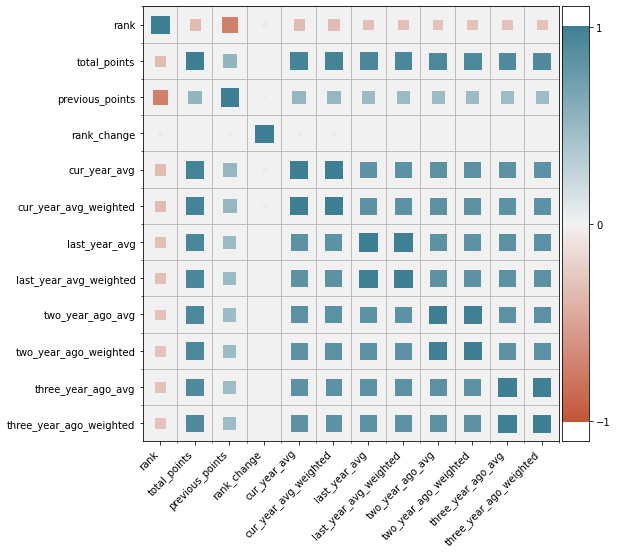

In [100]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(8, 8))
corrplot(rank.corr(), size_scale=300);

**Observations**

* Rank is negatively correlated to previous points which makes sence since the higher your rank the more points you'll have had
* Total points is postitively correlated with every other column exept the rank column

# Questions
**Using the polinomial approach**

Q1. Predict how many goals the home team scores.

Q2. Predict how many goals the away team scores.

**Using the logistic approach**

Q3. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


In [101]:
# importing sklearn Libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

# Q3. 
Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [ ]:
# let's start by performing logistic regression


# Q1.

Predict how many goals the home team scores.

# Q2. 
Predict how many goals the away team scores.

## Key
**Soccer**: merged dataset

**Soccer2**: soccer df without missing values(see <font color = orange>*Merging the Datasets* section</font> )